In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [17]:
sns.set()
data = pd.read_csv("uniform.csv")

data['r-squared'] = [-float(x[1:-1]) for x in data['fbest']]

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "sol", "Unnamed: 0", "r_value"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data.head()

,intercept,slope,r-squared,1,2,3,4,5,6
0,-262.018343,457.451038,0.982319,173.616962,644.166336,1231.914777,1553.600252,1832.816190,2598.247220
1,-305.029174,441.212931,0.999193,146.516177,549.445186,1054.483835,1441.660756,1889.880344,2353.310218
2,-333.527513,459.883734,0.993036,154.994494,527.668127,1095.327051,1536.437259,1848.517349,2493.449057
3,-261.134050,410.150633,0.998488,157.034441,525.667599,1014.455280,1349.979397,1807.094172,2192.128107
4,-333.749279,357.364763,0.986974,76.294288,413.895396,687.577353,966.974145,1467.794156,1889.629019


In [18]:
data.describe()

,intercept,slope,r-squared,1,2,3,4,5,6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,-302.751439,420.990146,0.984145,137.683631,564.930773,997.976688,1249.922545,1751.467114,2322.303674
std,42.244807,43.998989,0.008348,29.176756,83.256862,169.773520,206.914330,165.615127,274.599882
min,-406.539168,333.668252,0.972804,76.294288,413.895396,687.577353,904.595871,1394.388056,1790.045298
25%,-327.122608,389.556924,0.977242,124.858810,526.667863,883.129158,1073.517735,1677.877799,2121.311303
50%,-298.850085,439.340489,0.984166,150.431094,556.612417,1054.483835,1298.877230,1809.304025,2380.637170
75%,-267.602524,448.433406,0.987728,156.014467,632.446631,1086.114833,1392.858449,1842.387869,2493.742864
max,-244.001280,480.626542,0.999193,173.616962,701.247046,1256.491132,1553.600252,1930.609814,2749.514845


### Natural frequencies

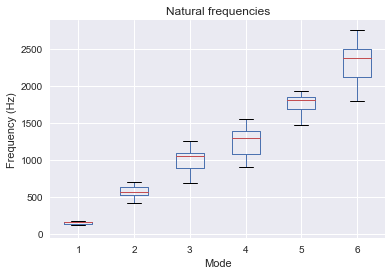

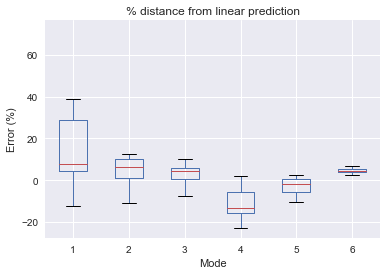

In [21]:
freq = data.drop(['intercept', 'slope', 'r-squared'], axis=1)
freq.boxplot()
plt.title("Natural frequencies")
plt.xlabel("Mode")
plt.ylabel("Frequency (Hz)")
plt.show()

error = data.drop(['r-squared'], axis=1)
error.columns = error.columns.astype(str)
for i in range(6):
    error[str(i+1)] = (error[str(i+1)] - ((i+1) * error['slope'] + error['intercept'])) / error[str(i+1)] * 100
error.drop(['intercept', 'slope'], axis=1, inplace=True)
error.boxplot()
plt.title("% distance from linear prediction")
plt.xlabel("Mode")
plt.ylabel("Error (%)")
plt.show()

### Solution properties

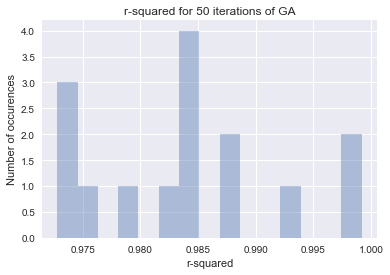

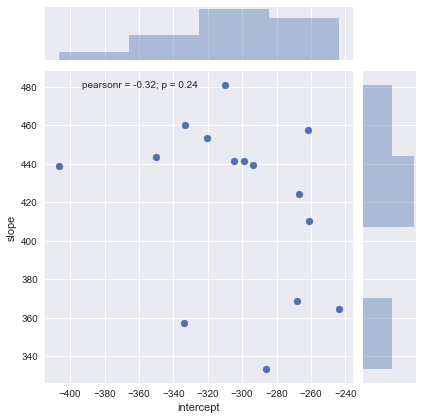

In [27]:
ax = sns.distplot(data['r-squared'], bins=15, kde=False, norm_hist=False)
ax.set(xlabel="r-squared", ylabel="Number of occurences", title="r-squared for 50 iterations of GA")
plt.show()

ax = sns.jointplot(data['intercept'], data['slope'])
plt.show()